# Flipkart 4.0

### Team Winners
### This model will extracts objects pictures from the images. 
### It uses UNET- Convolutional neural networks to do the semantic image analysis

In [1]:
import pickle
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
### LOAD PRETRAINED UNET ###
UNET = tf.keras.models.load_model('C:/Users/rakes/trained_models/fashion_unet.h5')

In [4]:
### DEFINE GRABCUT FUNCTION ###

def cut(img):

    img = cv.resize(img,(224,224))
    
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    height, width = img.shape[:2]

    rect = (50,10,width-100,height-20)
    cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img2 = img*mask2[:,:,np.newaxis]
    img2[mask2 == 0] = (255, 255, 255)
    
    final = np.ones(img.shape,np.uint8)*0 + img2
    
    return mask, final

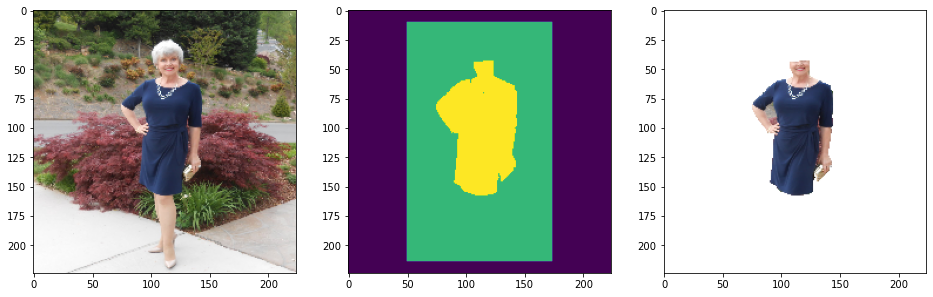

In [5]:
### APPLY GRUBCUT ###
plt.figure(figsize=(16,8))
original = cv.imread('C:/Users/rakes/multiclass_segmentation/testGrubCut.jpg')
original = cv.resize(original,(224,224))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGRA2RGB))
mask, final = cut(original)
plt.subplot(1,3,2)
plt.imshow(mask)
plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGB))

1/1 [==============================] - 5s 5s/step


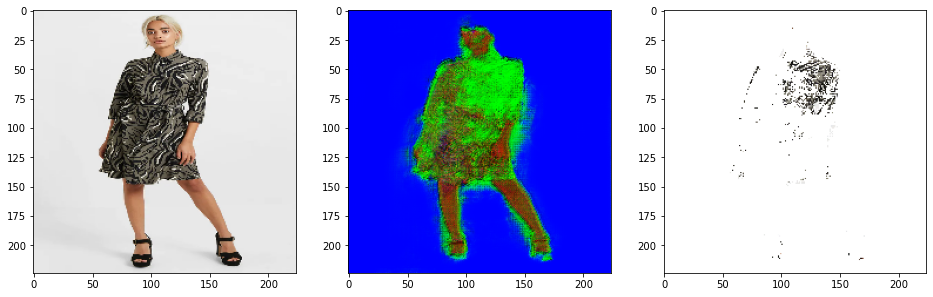

In [6]:
### READ NEW IMAGE ###
plt.figure(figsize=(16,8))
img = cv.imread('C:/Users/rakes/multiclass_segmentation/test1.jpg')
plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(cv.resize(img.copy(),(224,224)), cv.COLOR_BGRA2RGB))

### GRUBCUT + PREDICTION ###
mask_test, test = cut(img)
pred = UNET.predict(test[None,...])[0]
plt.subplot(1,3,2)
plt.imshow(pred)

### APPLY PIXEL TRESHOLD FOR MASK ###
pred_dress = pred.copy()[:,:,1]
pred_dress[pred_dress>=0.90]=1
pred_dress[pred_dress<0.90]=0
real_dress = (cv.resize(img.copy(),(224,224))*pred_dress[:,:,np.newaxis]).astype('int')
real_dress[pred_dress == 0] = (255, 255, 255)
plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(real_dress.astype('uint8'), cv.COLOR_BGRA2RGB))

1/1 [==============================] - 1s 599ms/step


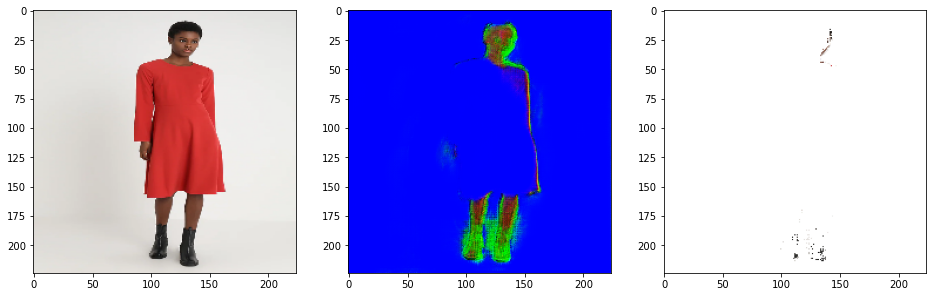

In [7]:
### READ NEW IMAGE ###
plt.figure(figsize=(16,8))
img = cv.imread('C:/Users/rakes/multiclass_segmentation/test2.jpg')
plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(cv.resize(img.copy(),(224,224)), cv.COLOR_BGRA2RGB))

### GRUBCUT + PREDICTION ###
mask_test, test = cut(img)
pred = UNET.predict(test[None,...])[0]
plt.subplot(1,3,2)
plt.imshow(pred)

### APPLY PIXEL TRESHOLD FOR MASK ###
pred_dress = pred.copy()[:,:,1]
pred_dress[pred_dress>=0.90]=1
pred_dress[pred_dress<0.90]=0
real_dress = (cv.resize(img.copy(),(224,224))*pred_dress[:,:,np.newaxis]).astype('int')
real_dress[pred_dress == 0] = (255, 255, 255)
plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(real_dress.astype('uint8'), cv.COLOR_BGRA2RGB))